In [13]:
import tensorflow as tf
from PIL import Image
from tensorflow.keras import layers


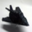

In [14]:
img=Image.open("D:\\python codes\\ML\\data1\\cifar10\\train\\airplane\\29_airplane.png")
img

In [15]:
img.size

(32, 32)

In [16]:
data= tf.keras.utils.image_dataset_from_directory(
    "D:\\python codes\\ML\\data1\\cifar10\\train",
    image_size=(32,32),
    color_mode="rgb",
    batch_size=50000
)

Found 50000 files belonging to 10 classes.


In [17]:
cnn_model=tf.keras.Sequential([
    layers.Conv2D(9,3,padding="same",activation="leaky_relu",input_shape=(32,32,3)),
    layers.MaxPool2D(),
    layers.Conv2D(18,3,padding="same",activation="leaky_relu"),
    layers.MaxPool2D(),
    layers.Conv2D(36,3,padding="same",activation="leaky_relu"),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10),
    layers.Softmax()
    
])

In [18]:
cnn_model.build(input_shape=(1,32,32,3))
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 9)         252       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 9)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 18)        1476      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 18)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 36)          5868      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 36)        

In [19]:
cnn_model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
 )

In [20]:
for features,labels in data:
    features=tf.divide(features,255)
    labels=tf.one_hot(labels,10)
    record=cnn_model.fit(features,labels,batch_size=50,epochs=20)
    print(features.shape, labels.shape)
    break

Epoch 1/20
1000/1000 [==============================] - 38s 37ms/step - loss: 1.5879 - accuracy: 0.4233
Epoch 2/20
1000/1000 [==============================] - 41s 41ms/step - loss: 1.2877 - accuracy: 0.5413
Epoch 3/20
1000/1000 [==============================] - 39s 39ms/step - loss: 1.1378 - accuracy: 0.6008
Epoch 4/20
1000/1000 [==============================] - 41s 41ms/step - loss: 1.0378 - accuracy: 0.6355
Epoch 5/20
1000/1000 [==============================] - 43s 43ms/step - loss: 0.9624 - accuracy: 0.6630
Epoch 6/20
1000/1000 [==============================] - 38s 38ms/step - loss: 0.9124 - accuracy: 0.6815
Epoch 7/20
1000/1000 [==============================] - 39s 39ms/step - loss: 0.8676 - accuracy: 0.6956
Epoch 8/20
1000/1000 [==============================] - 39s 39ms/step - loss: 0.8241 - accuracy: 0.7142
Epoch 9/20
1000/1000 [==============================] - 39s 39ms/step - loss: 0.7938 - accuracy: 0.7227
Epoch 10/20
1000/1000 [==============================] - 39s 39m

In [21]:
model=cnn_model.save("cifar10_img_pred.h5",save_format="h5")
model=tf.keras.models.load_model("cifar10_img_pred.h5")